# ĐỒ ÁN KẾT THÚC HỌC PHẦN
*Thống kê suy diễn*

In [317]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [318]:
df = pd.read_csv('Diet_R.csv')

In [319]:
df.head(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
7,6,0,50,201,66,1,64.0
8,7,0,37,174,67,1,65.0
9,8,0,28,176,69,1,60.5


# Tạo hàm

In [320]:
def results(p, alpha=0.05):
  cols=['f_score', 'p_value', 'KetLuan']
  if p['p_value'] < alpha:
    p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
  if p['p_value'] >= alpha:
    p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
  df = pd.DataFrame(p, index=[''])
  return df[cols]

In [321]:
def kt_phan_phoi_chuan(data):
  k, p = stats.kstest(rvs=data, cdf='norm', args=(np.mean(data), np.std(data)))
  if p > 0.05:
    print('''Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng các mẫu hiện tại tuân theo luật phân phối chuẩn''')
  else:
    print('''Có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng các mẫu hiện tại không tuân theo luật phân phối chuẩn''')

In [322]:
def qq_plot(data):
  def standadize(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean)/std   
     
  sm.qqplot(standadize(data), line ='45')
  plt.show()

In [323]:
def hist_plot(data):
  mean = np.mean(data)
  std = np.std(data, ddof=1)
  domain = np.linspace(np.min(data), np.max(data))
  plt.plot(domain, stats.norm.pdf(domain, mean, std), color='blue')
  plt.hist(data, color='red', edgecolor='black', density=True)  

#Nghiên cứu sự giảm cân của 3 phương pháp khác nhau

**Phát biểu giả thuyết:**

$H_{0}$: Không có sự khác biệt về hiệu quả giữa các phương pháp giảm cân

$H_{a}$: Tồn tại ít nhất 2 phương pháp có hiệu quả giảm cân khác nhau

Tính số cân nặng đã giảm

In [324]:
df['weightloss'] = df['pre.weight'] - df['weight6weeks']

In [325]:
df_diet_loss = df[['Diet','weightloss']].copy()

In [326]:
df_diet_loss

,Diet,weightloss
0,2,0.0
1,2,0.0
2,1,3.8
3,1,6.0
4,1,0.7
...,...,...
73,3,2.8
74,3,4.1
75,3,5.3
76,3,9.2


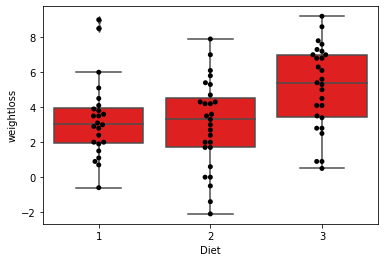

In [327]:
sns.boxplot(x='Diet',y='weightloss',data = df_diet_loss, color='red')
sns.swarmplot(x='Diet',y='weightloss', data = df_diet_loss, color='black')
plt.show()

In [328]:
weightloss_1 = []
weightloss_2 = []
weightloss_3 = []
wl = df_diet_loss["weightloss"]
diet = df_diet_loss['Diet']
for i in range(1, len(df_diet_loss)):
    if diet[i] == 1 :
        weightloss_1.append(wl[i])
    if diet[i] == 2:
        weightloss_2.append(wl[i])
    if diet[i] == 3:
        weightloss_3.append(wl[i])
    
diet_weight_loss = list(zip(weightloss_1, weightloss_2, weightloss_3))
df_1 =  pd.DataFrame(diet_weight_loss, columns = ("Diet 1", "Diet 2", "Diet 3"))
df_1.head(10)

,Diet 1,Diet 2,Diet 3
0,3.8,0.0,7.0
1,6.0,-2.1,5.6
2,0.7,2.0,3.4
3,2.9,1.7,6.8
4,2.8,4.3,7.8
5,2.0,7.0,5.4
6,2.0,0.6,6.8
7,8.5,2.7,7.2
8,1.9,3.6,7.0
9,3.1,3.0,7.3


##Kiểm tra mẫu có tuân theo phân phối chuẩn hay không

**Phát biểu giả thuyết:**

$H_{0}$: Mẫu tuân theo phân phối chuẩn

$H_{a}$: Mẫu không tuân theo phân phối chuẩn

Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng các mẫu hiện tại tuân theo luật phân phối chuẩn


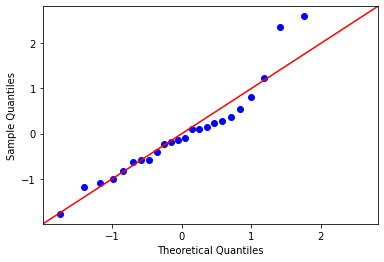

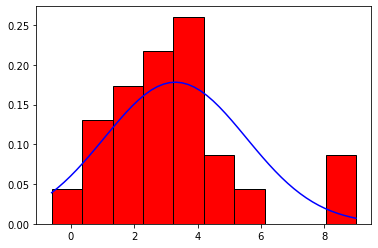

In [329]:
kt_phan_phoi_chuan(df_1['Diet 1'])
qq_plot(df_1['Diet 1'])
hist_plot(df_1['Diet 1'])

Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng các mẫu hiện tại tuân theo luật phân phối chuẩn


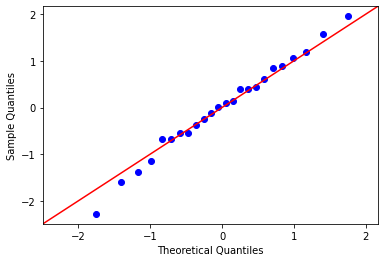

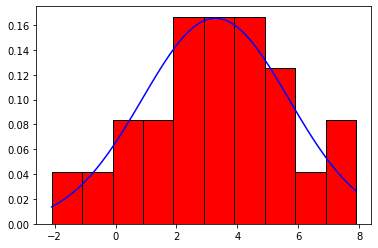

In [330]:
kt_phan_phoi_chuan(df_1['Diet 2'])
qq_plot(df_1['Diet 2'])
hist_plot(df_1['Diet 2'])

Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng các mẫu hiện tại tuân theo luật phân phối chuẩn


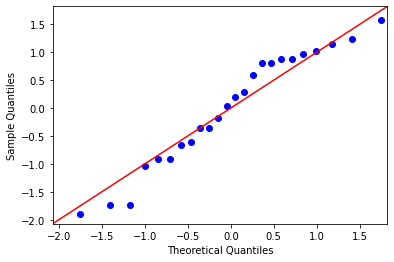

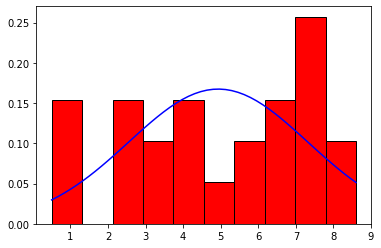

In [331]:
kt_phan_phoi_chuan(df_1['Diet 3'])
qq_plot(df_1['Diet 3'])
hist_plot(df_1['Diet 3'])

##Kiểm định ANOVA

In [332]:
model = ols('weightloss ~ C(Diet)', data=df_diet_loss).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [333]:
anova_table

,sum_sq,df,F,PR(>F)
C(Diet),71.093689,2.0,6.197447,0.003229
Residual,430.179259,75.0,NaN,NaN


In [334]:
p = {}
p['f_score'] = anova_table['F'][0]
p['p_value'] = anova_table['PR(>F)'][0]
results(p)

,f_score,p_value,KetLuan
,6.197447,0.003229,Chấp nhận H1 với mức ý nghĩa 0.05


*Điều này ngụ ý rằng: Có ít nhất một cặp phương án giảm cân có hiệu quả khác nhau*

##Kiểm tra hậu nghiệm

In [335]:
tukey = pairwise_tukeyhsd(endog=df_diet_loss['weightloss'],
                         groups=df_diet_loss['Diet'],
                         alpha=0.05)

In [336]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.2741,0.9,-1.8806,1.3325,False
1,3,1.8481,0.0201,0.2416,3.4547,True
2,3,2.1222,0.0048,0.5636,3.6808,True


# Nghiên cứu về sự giảm cân với giới tính khác nhau

**Phát biểu giả thuyết:**

$H_{0}$: Không có sự khác biệt về hiệu quả giảm cân so với giới tính khác nhau

$H_{a}$: Có sự khác nhau về hiệu quả giảm cân so về giới tính khác nhau

In [337]:
df_gen_losingweight = df[['gender','weightloss']].copy()
df_gen_losingweight = df_gen_losingweight.replace(r'^\s*$', np.nan, regex=True)
df_gen_losingweight = df_gen_losingweight.dropna()
df_gen_losingweight

,gender,weightloss
2,0,3.8
3,0,6.0
4,0,0.7
5,0,2.9
6,0,2.8
...,...,...
73,1,2.8
74,1,4.1
75,1,5.3
76,1,9.2


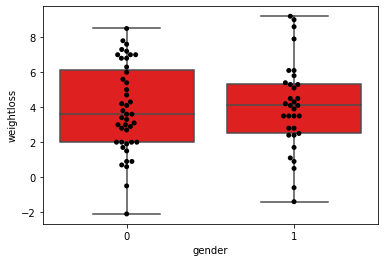

In [338]:
sns.boxplot(x='gender',y='weightloss',data = df_gen_losingweight, color='red')
sns.swarmplot(x='gender',y='weightloss', data = df_gen_losingweight, color='black')
plt.show()

##Kiểm định ANOVA

In [339]:
model_2 = ols('weightloss ~ C(gender)', data=df_gen_losingweight).fit()
anova_table = sm.stats.anova_lm(model_2, typ=2)

In [340]:
anova_table

,sum_sq,df,F,PR(>F)
C(gender),0.278485,1.0,0.043786,0.834827
Residual,470.650331,74.0,NaN,NaN


In [341]:
p = {}
p['f_score'] = anova_table['F'][0]
p['p_value'] = anova_table['PR(>F)'][0]
results(p)

,f_score,p_value,KetLuan
,0.043786,0.834827,Chấp nhận H0 với mức ý nghĩa 0.05


*Điều này ngụ ý rằng: Giới tính không liên quan đến hiệu quả giảm cân*

**Vì đã chấp nhận $H_{0}$ nên không cần tiến hành kiểm tra hậu nghiệm**

#Kiểm tra mẫu có tuân theo phân phối chuẩn không

**Phát biểu giả thuyết:**

$H_{0}$: Mẫu tuân theo phân phối chuẩn

$H_{a}$: Mẫu không tuân theo phân phối chuẩn

In [342]:
p_v = stats.shapiro(model_2.resid)[1]
if p_v > 0.05:
    print(f'Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu không tuân theo phân phối chuẩn (H1)')

Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn


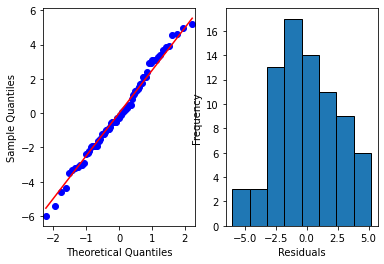

In [343]:
fig, ax = plt.subplots(1,2)
sm.qqplot(model_2.resid,line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model_2.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()